In [16]:
import gc
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [17]:
L = 10  # odd
ls = 30 # even
bond = 30 # resonable amount
path  = f"/home/mehran/4th_project-Haldan_anisotropic/dataset_L={L}_bond={bond}_ls={ls}"

In [18]:
file_path_11 = os.path.join(path, "kernel_test_Haldane_11.hdf5")
file_path_12 = os.path.join(path, "kernel_test_Haldane_12.hdf5")
file_path_21 = os.path.join(path, "kernel_test_Haldane_21.hdf5")
file_path_22 = os.path.join(path, "kernel_test_Haldane_22.hdf5")
res11 = h5py.File(file_path_11 ,'r')[' gram_matrix_DMRG_11'][:]
res12 = h5py.File(file_path_12 ,'r')[' gram_matrix_DMRG_12'][:]
res21 = h5py.File(file_path_21 ,'r')[' gram_matrix_DMRG_21'][:]
res22 = h5py.File(file_path_22 ,'r')[' gram_matrix_DMRG_22'][:]
kernel = np.block([[res11, res12],
                  [res21, res22]])

In [33]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=7, affinity='precomputed', assign_labels='discretize',random_state=0)
model.fit(kernel)
test_labels_S=model.labels_

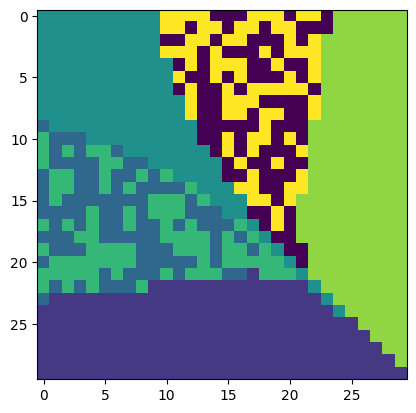

In [34]:
plt.imshow(test_labels_S.reshape(ls,ls))

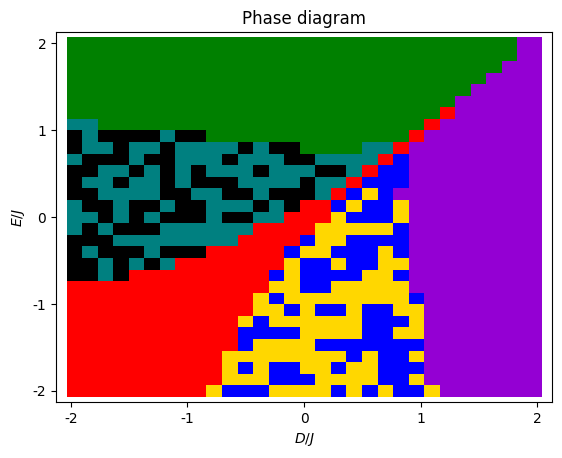

In [35]:
mat = test_labels_S.reshape(ls,ls) #   y = -1  Antiferromagnetic, y = 1  Paramagnetic, y = 0  SPT
r = mat.shape[0]
c = mat.shape[1]
dy = 4/r
dx = 4/c

for i in range(r):
    for j in range(c):
        if mat[i,j] == 0:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color = 'teal',s=300, edgecolors='none')
        elif mat[i,j] == 1:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2, marker = 's', color = 'darkviolet', s=300,  edgecolors='none')
        elif mat[i,j] == 2:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='gold',s =300,  edgecolors='none')
        elif mat[i,j] == 3:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='red',s =300,  edgecolors='none')
        elif mat[i,j] == 4:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='blue',s =300,  edgecolors='none')
        elif mat[i,j] == 5:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='green',s =300,  edgecolors='none')
        elif mat[i,j] == 6:
            plt.scatter(i*(4/r)+dx/2,j*(4/c)+dy/2,marker = 's', color ='black',s =300,  edgecolors='none')

plt.xlabel('$D/J$')
plt.ylabel('$E/J$')
plt.title('Phase diagram')
plt.xticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.yticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.savefig('phase_diagram_DMRG_states.png')
plt.show()
